In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Churn_Modelling.csv', index_col = 0)

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


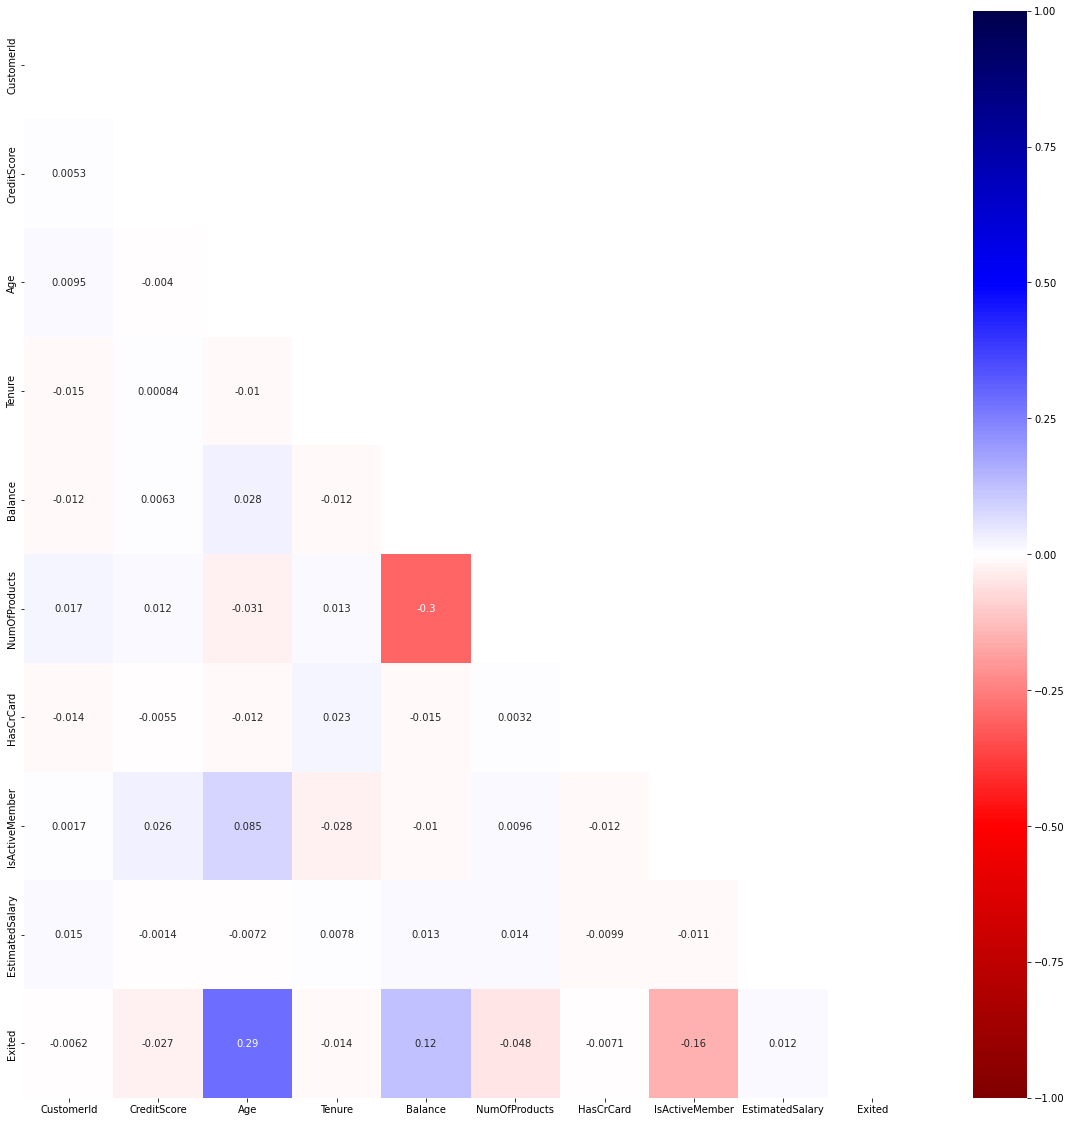

In [4]:
plt.figure(figsize=(20,20))
upper = np.triu(df.corr())  # optionally, you can just look at the lower triangle
sns.heatmap(df.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper);

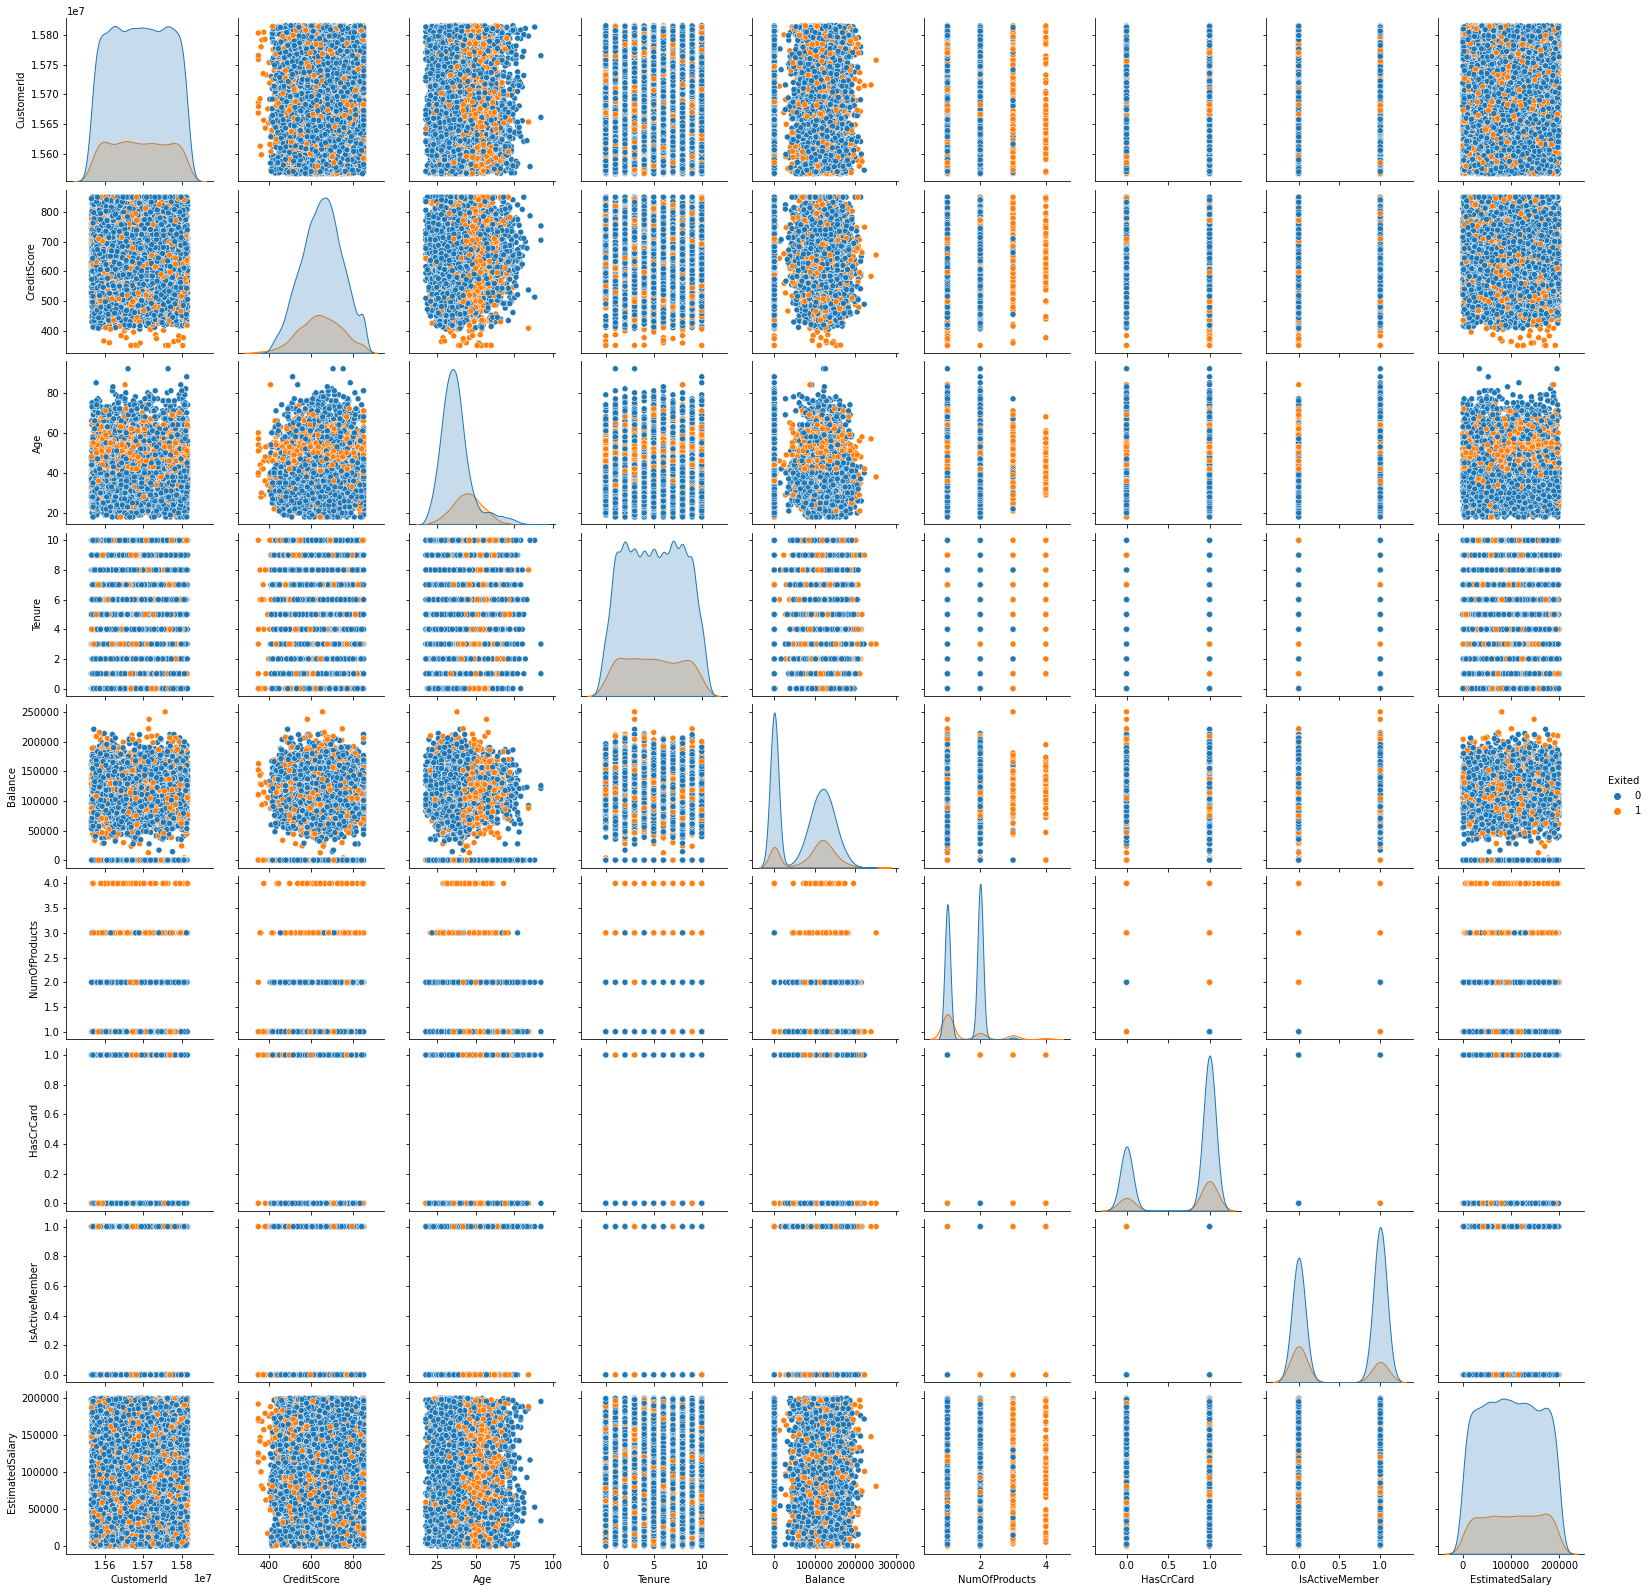

In [5]:
sns.pairplot(df, hue = 'Exited')

In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

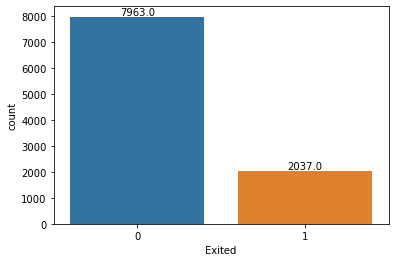

In [7]:
plot = sns.countplot(x='Exited', data=df)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

In [8]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
dft = df.groupby(['Gender'])["Exited"].sum().sort_values(ascending = True)
dft

Gender
Male       898
Female    1139
Name: Exited, dtype: int64

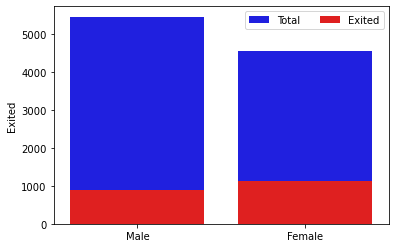

In [10]:
bar1 = sns.barplot(x=['Male', 'Female'], y=df['Gender'].value_counts(), label = 'Total', color='blue')
bar2 = sns.barplot(x=['Male', 'Female'], y=dft, data = df, label = 'Exited', color='red')
plt.legend(ncol=2, loc="upper right", frameon=True)
plt.show()

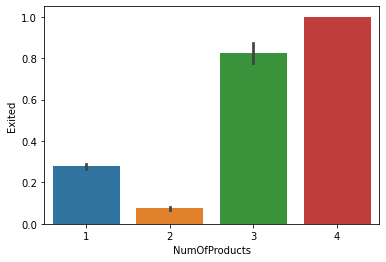

In [11]:
bar1 = sns.barplot(x=df['NumOfProducts'], y=df['Exited'])

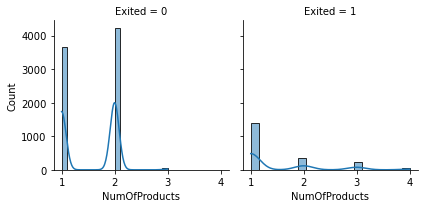

In [12]:
g=sns.FacetGrid(df, col = "Exited")
g.map(sns.histplot, "NumOfProducts", kde = True)
plt.show()

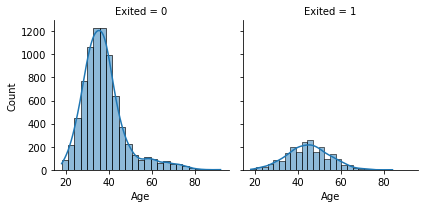

In [13]:
g=sns.FacetGrid(df, col = "Exited")
g.map(sns.histplot, "Age", bins = 25, kde = True)
plt.show()

In [14]:
Retain_age = np.mean(df[df['Exited']==0]['Age'])
Exit_age = np.mean(df[df['Exited']==1]['Age'])
print("Exited Mean Age = {:.2f} Retained Mean Age = {:.2f}".format(Exit_age, Retain_age))

Exited Mean Age = 44.84 Retained Mean Age = 37.41


<AxesSubplot:xlabel='Exited', ylabel='Age'>

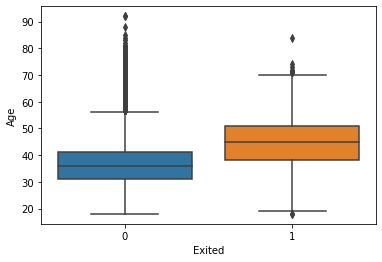

In [41]:
sns.boxplot(y='Age', x='Exited', data=df)

In [48]:
# df['New_Age'] = pd.qcut(df['Age'], q=3, labels = False)

In [49]:
# df.groupby('New_Age')["Age"].agg(['min','max','count'])

,min,max,count
New_Age,,,
0,18,34,3679
1,35,41,3106
2,42,92,3215


<AxesSubplot:xlabel='New_Age', ylabel='count'>

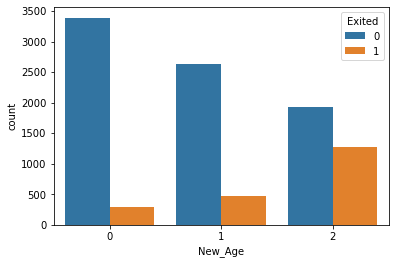

In [51]:
# sns.countplot(x='New_Age', hue= 'Exited', data=df)

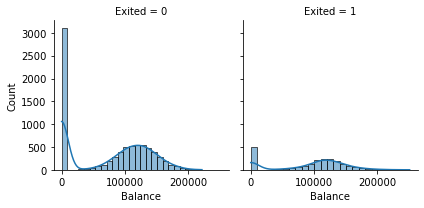

In [15]:
g=sns.FacetGrid(df, col = "Exited")
g.map(sns.histplot, "Balance", bins = 25, kde = True)
plt.show()

In [16]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [28]:
def Balance_range(data):
    if data <= 0:
        return 'Zero'
#     elif data < 97198.54:
#         return 'Low'
    elif data < 120000:
        return 'Mid'
    else:
        return 'High'



In [29]:
df['New_Balance'] = df['Balance'].apply(Balance_range)

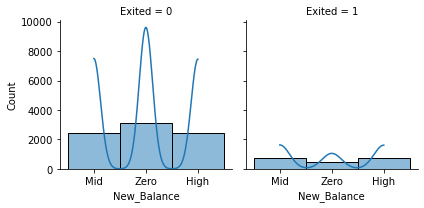

In [30]:
g=sns.FacetGrid(df, col = "Exited")
g.map(sns.histplot, "New_Balance", bins = 4, kde = True)
plt.show()

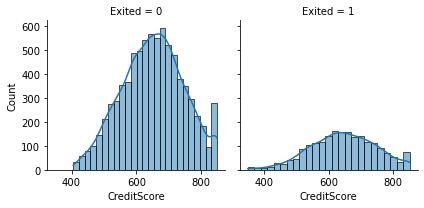

In [19]:
g=sns.FacetGrid(df, col = "Exited")
g.map(sns.histplot, "CreditScore", bins = 25, kde = True)
plt.show()

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

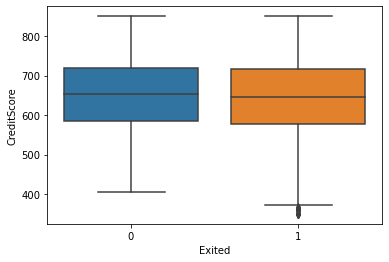

In [42]:
sns.boxplot(y='CreditScore', x='Exited', data=df)

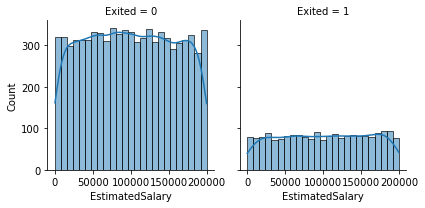

In [20]:
g=sns.FacetGrid(df, col = "Exited")
g.map(sns.histplot, "EstimatedSalary", bins = 25, kde = True)
plt.show()

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

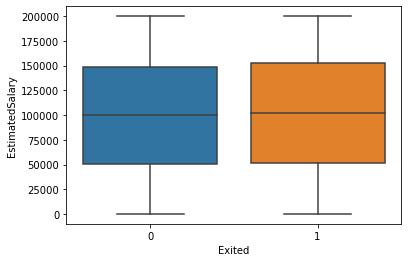

In [43]:
sns.boxplot(y='EstimatedSalary', x='Exited', data=df)

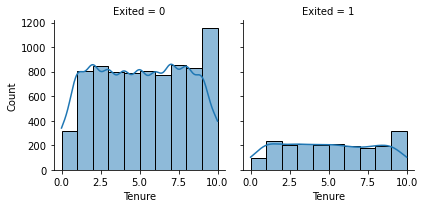

In [21]:
g=sns.FacetGrid(df, col = "Exited")
g.map(sns.histplot, "Tenure", bins = 10, kde = True)
plt.show()

In [22]:
df.Balance[(df['Exited']==1) & (df['Balance']== 0)].count()

500

In [23]:
df[(df['Exited']==1) & (df['Balance']== 0)]['CreditScore'].mean()

643.862

In [33]:
cols = df.columns.tolist()
cols[12] = 'New_Balance'
cols[13] = 'Exited'
cols

['CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'New_Balance',
 'Exited']

In [35]:
df = df[cols]
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,New_Balance,Exited
RowNumber,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Zero,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Mid,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,High,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Zero,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,High,0


In [36]:
df.to_csv('Churn_Eng_Data.csv')